In [32]:
# importing: pandas, matplotlib, seaborn, nltk, re, sklearn

data_review = pd.read_csv("IMDB_Dataset.csv")

# take 30000 review out of 50000 to train the model
data_positive = data_review[data_review['sentiment']=='positive'][:15000]
data_negative = data_review[data_review['sentiment']=='negative'][:15000]

data_review_short = pd.concat([data_positive, data_negative])
data_review_short.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


Text Preprocessing

In [34]:
negative_words = {"not", "never", "no"}
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words or word in negative_words]
    return ' '.join(tokens)

data_review_short['review'] = data_review_short['review'].apply(preprocess_text)

Logistic Regression Implementation

In [35]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_review_short['review'])
y = data_review_short['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

def predict_sentiment(review):
    review = preprocess_text(review)
    review_tfidf = vectorizer.transform([review])
    return model.predict(review_tfidf)

new_negative = "This movie was horrible! I hated it."
print(f"Should be negative. Predict: {predict_sentiment(new_negative)}")

new_positive = "This movie was fantastic! I loved it."
print(f"Should be positive. Predict: {predict_sentiment(new_positive)}")

Should be negative. Predict: ['negative']
Should be positive. Predict: ['positive']


Model Accuracy

In [36]:
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8928333333333334
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      2952
    positive       0.88      0.91      0.90      3048

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.89      6000
weighted avg       0.89      0.89      0.89      6000



 Confusion Matrix

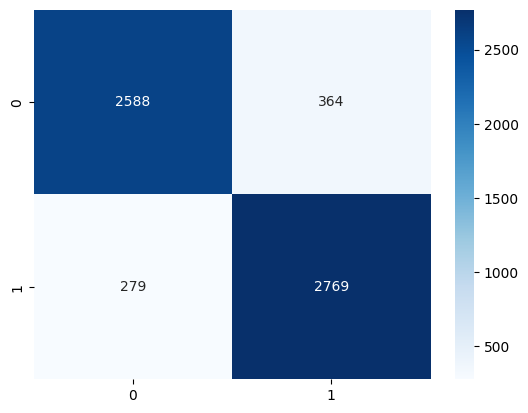

In [37]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()